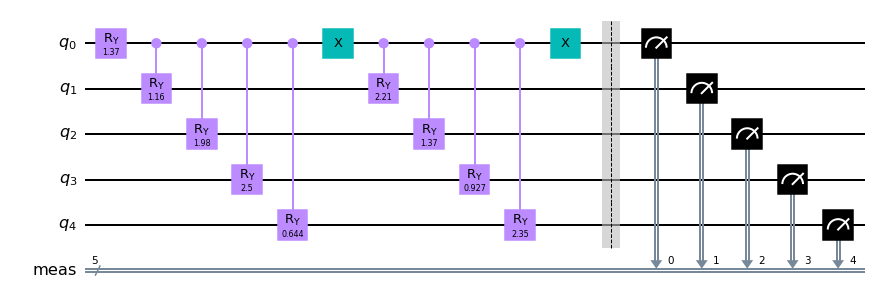

In [5]:
import qiskit
from qiskit import QuantumCircuit
import numpy as np

# Function to calculate rotation angle
def calc_angle(prob):
    #Calculate the angle using the formula
    return 2 * np.arccos(np.sqrt(prob))

def create_quantum_circuit(null_prior, null_probs, positive_probs):
    # Calculate angles based on the provided probabilities
    theta_y = calc_angle(null_prior)
    null_rotations = [calc_angle(conditional) for conditional in null_probs]
    pos_rotations = [calc_angle(conditional) for conditional in positive_probs]
    
    # Initialize the quantum circuit with n qubits and n classical bits
    assert(len(null_probs) == len(positive_probs))
    n = len(null_probs) #Number of features
    circ = QuantumCircuit(n+1)
    
    # Implementing the gates based on the calculated thetas
    circ.ry(theta_y, 0)  # Encode P(y=0) into qubit 0
    for i in range(n):
        circ.cry(null_rotations[i], 0, i+1)
    circ.x(0)  # Flip y to represent y=1
    for i in range(n):
        circ.cry(pos_rotations[i], 0, i+1) # Now for y=1, encode P(x1|y=1)
    circ.x(0)  # Reset y back
    
    # Measure 
    circ.measure_all()  # Measure both the label and feature qubits
    
    return circ

# Example usage
P_y0 = 0.6
P_xn_given_y0 = [0.7, 0.3, 0.1, 0.9]
P_xn_given_y1 = [0.2, 0.6, 0.8, 0.15]
circ = create_quantum_circuit(P_y0, P_xn_given_y0, P_xn_given_y1)

# To draw the circuit using Matplotlib, ensure you have matplotlib installed and your environment supports plotting
circ.draw('mpl')
